## Import Dataset

In [40]:
# GitHub https://github.com/debayanmitra1993-data/Blindness-Detection-Diabetic-Retinopathy-
# Research Kernel Link - https://arxiv.org/pdf/2003.02261.pdf

import pandas as pd
import numpy as np
import itertools
import os
import sys
# from prettytable import PrettyTable
import pickle
import multiprocessing
from multiprocessing.pool import ThreadPool
from tqdm import tqdm_notebook
print(multiprocessing.cpu_count()," CPU cores")

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

from PIL import Image
import cv2

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation,BatchNormalization,GlobalMaxPooling2D,concatenate,Flatten
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,Callback
from keras.initializers import random_normal
from keras.models import load_model
from keras.losses import binary_crossentropy,categorical_crossentropy,mean_squared_error
from keras import backend as K

import tensorflow as tf

2  CPU cores


In [17]:
from google.colab import drive
import os

drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/University Of Stirling/Dissertation/retinal-rec/Datasets/APTOS2019'

os.chdir(dataset_path)
print("We are currently in the folder of ",os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
We are currently in the folder of  /content/drive/My Drive/University Of Stirling/Dissertation/retinal-rec/Datasets/APTOS2019


In [47]:
# Load dataset and train-test split
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2

# Only a subset of the dataset has been uploaded to Drive
id_codes=os.listdir('./train_images')
id_codes=[x.split('.')[0] for x in id_codes]

labels = pd.read_csv('train.csv')
labels = labels[(labels['id_code'].isin(id_codes))]

train_labels, test_labels = train_test_split(labels, test_size=0.2)

train_images = []
test_images = []

for img_id in train_labels["id_code"]:
    img = cv2.imread('./train_images/' + img_id + ".png")
    # cv2.COLOR_BGR2RGB is specified as CV2 utilises BGR, but our original image is RGB 
    train_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

for img_id in test_labels["id_code"]:
    img = cv2.imread('./train_images/' + img_id + ".png")
    # cv2.COLOR_BGR2RGB is specified as CV2 utilises BGR, but our original image is RGB 
    test_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

2


<Figure size 1440x1440 with 0 Axes>

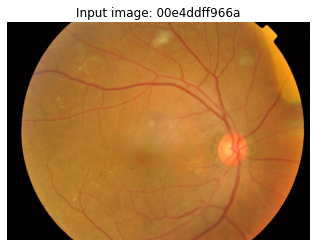

In [50]:
plt.figure(figsize=(20,20))

fig, ax = plt.subplots(1,1) 
    
ax.imshow(train_images[0]) 
ax.set_title('Input image: ' + train_labels["id_code"].iloc[0]) 
ax.axis('off') 

print(train_labels["diagnosis"].iloc[0])

In [ ]:
# Unmount Drive
drive.flush_and_unmount()